<a href="https://colab.research.google.com/github/sandipanpaul21/ML-Code-in-Python/blob/master/07_Simple_and_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries 

from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["HOUSEPRICE"] = boston.target
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOUSEPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Dataset overall Information
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  HOUSEPRICE  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
# Let set the BASE MODEL on which we will improve

# Assigning Independent and Dependent variables
dependent_variable = boston_pd[['HOUSEPRICE']]
print("DEPENDENT VARIABLE : ",dependent_variable.columns)
independent_variables = boston_pd[boston_pd.columns[0:12]]
print("INDEPENDENT VARIABLES : ")
print(independent_variables.columns)

DEPENDENT VARIABLE :  Index(['HOUSEPRICE'], dtype='object')
INDEPENDENT VARIABLES : 
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')


In [5]:
# Base Model

import statsmodels.api as sm
from statsmodels.api import OLS
OLS(dependent_variable, independent_variables).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              846.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   2.38e-320
Time:                        14:27:54   Log-Likelihood:                         -1556.1
No. Observations:                 506   AIC:                                      3136.
Df Residuals:                     494   BIC:                                      3187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1439      0.036     -3.990      0.000      -0.215      -0.073
ZN             0.0413      0.015      2.696      0.007       0.011       0.071
INDUS         -0.0370      0.068     -0.540      0.589      -0.172       0.098
CHAS           3.2525      0.961      3.384      0.001       1.364       5.141
NOX          -10.8653      3.422     -3.175      0.002     -17.590      -4.141
RM             7.1436      0.289     24.734      0.000       6.576       7.711
AGE           -0.0449      0.014     -3.235      0.001      -0.072      -0.018
DIS           -1.2292      0.206     -5.980      0.000      -1.633      -0.825
RAD            0.2008      0.071      2.829      0.005       0.061       0.340
TAX           -0.0100      0.004     -2.391      0.017      -0.018      -0.002
PTRATIO       -0.6575      0.112     -5.881      0.000      -0.877      -0.438
B              0.0165      0.003      5.779      0.000       0.011       0.022
==============================================================================
Omnibus:                      277.013   Durbin-Watson:                   0.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3084.310
Skew:                           2.148   Prob(JB):                         0.00
Kurtosis:                      14.307   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Output Explaination 

# Omnibus/Prob(Omnibus) - 
# A test of the skewness and kurtosis of the residual.
# We hope to see a value close to zero which would indicate normalcy. 
# The Prob (Omnibus) performs a statistical test indicating 
# the probability that the residuals are normally distributed. 
# We hope to see something close to 1 here. 
# In this case Omnibus = 277 (way higher than 1) and Prob(Omnibus) = 0 
# is way high (normally = 1) and the Prob (Omnibus) is 0 which is way too low
# so the data is not normal, not ideal. 

# Skew - 
# Measure of data symmetry.
# We want to see something close to zero, indicating the residual distribution is normal. 
# Note that this value also drives the Omnibus
# In this case, Skewness = 2.148, way higher than 0 so error/residual is skewwed

# Kurtosis - 
# Measure of "peakiness", or curvature of the data. 
# Kurtosis of the normal distribution is 3.0.
# In this case, Kurtosis = 14 which is way too higher

# Durbin-Watson - 
# Tests for homoscedasticity
# We hope to have a value between 1 and 2. 
# In this case, Durbin-Watson = 0.927 is close, but within limits.

# Jarque-Bera (JB)/Prob(JB) - 
# like the Omnibus test in that it tests both skew and kurtosis. 
# It is also performed for the distribution analysis of the regression errors.
# A large value of JB test indicates that the errors are not normally distributed.
# In this case, JB = 3084 which is way too higher so error are not normally distributed

# Condition Number -
# This test measures the sensitivity of a function's output as compared to its input 
# When we have multicollinearity, we can expect much higher fluctuations to small changes in the data,
# hence, we hope to see a relatively small number, something below 30. 
# In this case, Condition Number = well above 30, so multicollinearity present

# R Square and Adjusted R Square - 
# Both measures model performance and Possible values range from 0.0 to 1.0. 
# The Adjusted R Squared value is always a bit lower than the Multiple R-Squared value 
# Adjusted R Square consequently is a more accurate measure of model performance.
# Adding an additional explanatory variable to the model will likely 
# increase the Multiple R-Squared value, but decrease the Adjusted R-Squared value
# Adjusted R Square will only increase when good variables are added in the model
# Higher the Adjusted R Square, better is the model
# In this case, Adjusted R Square = 0.95 which is good for the model

# F Statistics and Prob(F Statistics) - 
# This test for overall significance has the following two hypotheses:
# Null hypothesis : Model with no independent variables fits the data as well as your model.
# Alternative hypothesis : Model fits the data better than the intercept-only model.
# In this case, P(F-Statistics) = less than 0.05 suggests Independent variables are important

# P Value - 
# If the p-value for a variable is less than your significance level (0.05)
# sample data provide enough evidence to reject the null hypothesis for the entire population.
# Null hypothesis that the variable has no correlation with the dependent variable. 
# If No correlation, no association between the changes in the independent & dependent variable.
# In this case, Remove all variables with P values greater than 0.05

# Log-Likelihood, AIC and BIC are for LOGISTIC REGRESSION MODEL

In [7]:
# Let test the Base Model

# Dividing Data into training and test set
from sklearn.model_selection import train_test_split 
data_train, data_test, house_price_train, house_price_test = train_test_split(independent_variables,dependent_variable,train_size = 0.7)
print("Training Data Shape :", data_train.shape)
print("Training House Price Shape :", house_price_train.shape)
print("Test Data Shape :",data_test.shape)
print("Test House Price Shape :",house_price_test.shape)

Training Data Shape : (354, 12)
Training House Price Shape : (354, 1)
Test Data Shape : (152, 12)
Test House Price Shape : (152, 1)


In [8]:
# Base Model
Model_1 = OLS(house_price_train,data_train).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             HOUSEPRICE   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              683.2
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                   1.18e-230
Time:                        14:27:55   Log-Likelihood:                         -1058.2
No. Observations:                 354   AIC:                                      2140.
Df Residuals:                     342   BIC:                                      2187.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1145      0.038     -3.035      0.003      -0.189      -0.040
ZN             0.0408      0.016      2.490      0.013       0.009       0.073
INDUS          0.0078      0.077      0.101      0.919      -0.144       0.160
CHAS           2.4068      1.072      2.245      0.025       0.298       4.516
NOX           -7.7256      3.904     -1.979      0.049     -15.404      -0.048
RM             7.0263      0.325     21.621      0.000       6.387       7.666
AGE           -0.0488      0.015     -3.310      0.001      -0.078      -0.020
DIS           -0.9674      0.221     -4.373      0.000      -1.403      -0.532
RAD            0.1440      0.078      1.848      0.066      -0.009       0.297
TAX           -0.0108      0.005     -2.321      0.021      -0.020      -0.002
PTRATIO       -0.7262      0.121     -5.996      0.000      -0.964      -0.488
B              0.0158      0.003      5.163      0.000       0.010       0.022
==============================================================================
Omnibus:                      238.447   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4583.317
Skew:                           2.486   Prob(JB):                         0.00
Kurtosis:                      19.912   Cond. No.                     8.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Base Model Test and Metrics

from sklearn import metrics
Prediction_1 = Model_1.predict(data_test)
print("Mean Absolute Error :",metrics.mean_absolute_error(house_price_test,Prediction_1).round(2))
print("Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))
print("Root Mean Squared Error :",metrics.mean_squared_error(house_price_test,Prediction_1).round(2))

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("Mean Absolute Percentage Error :",mape(house_price_test,Prediction_1).round(2))

# MAE is Absolute difference between the Model Predictions & True(Actual) values
# MSE is Square difference between Model Predictions & True values
# MSE affected by Outliers, because we Square the distance
# RMSE, square root(MSE) therefore cancelling the affect the square 
# MAE value can range from 0 to infinity, difficult to interpret
# MAPE is equivalent to MAE but provide the error in a percentage(0-100)

# MAPE = 49.65,average difference between predicted & actual is 49.7% which is very high

Mean Absolute Error : 3.96
Mean Squared Error : 39.03
Root Mean Squared Error : 39.03
Mean Absolute Percentage Error : 48.16


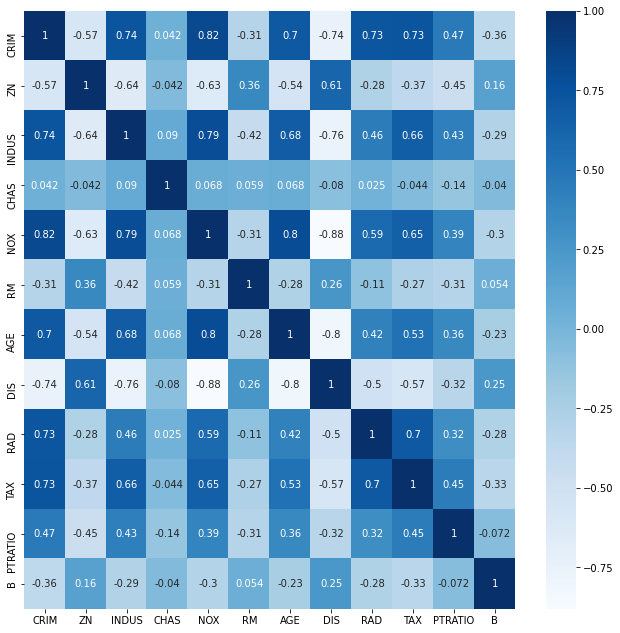

In [10]:
# Model 2, let do some data cleaning

# Increasing the size of the plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) # Sample figsize in inches, change the number accordingly
sns.heatmap(independent_variables.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# Inference : 
# Lots of High Correlation Values

In [11]:
# Filtering Highly Positive or Negative Correlated Values

# Create correlation matrix
corr_matrix = independent_variables.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44


In [12]:
# Find index of feature columns with correlation greater than 0.75
Pos_corr_var=np.where(corr_matrix > 0.75)
Pos_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Pos_corr_var) if x!=y and x<y]
print("Highly Positive Related (> 0.75) : ")
print(Pos_corr_var)

# Find index of feature columns with correlation less than - 0.75
Neg_corr_var=np.where(corr_matrix < -0.75)
Neg_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*Neg_corr_var) if x!=y and x<y]
print("Highly Negatively Related (< - 0.75) : ")
print(Neg_corr_var)

# Inference : 
# Remove 'INDUS' / 'NOX', 'RAD'/'TAX , 'NOX'/'DIS'
# Removing NOX
independent_variables = independent_variables.drop(['NOX'], axis = 1)

# Now out of 'RAD' & 'TAX' which one to remove ? VIF

Highly Positive Related (> 0.75) : 
[('INDUS', 'NOX'), ('RAD', 'TAX')]
Highly Negatively Related (< - 0.75) : 
[('NOX', 'DIS')]


In [13]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

calc_vif(independent_variables).sort_values("VIF")

# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 20 indicates high multicollinearity between this independent variable and the others

# Inference : 
# Remove 'RM','TAX' and 'PTRATIO'

independent_variables = independent_variables.drop(['RM', 'TAX', 'PTRATIO'], axis = 1) 

Quantile Distribution
           CRIM
0.00   0.006320
0.10   0.038195
0.20   0.064170
0.30   0.099245
0.40   0.150380
0.50   0.256510
0.60   0.550070
0.70   1.728440
0.80   5.581070
0.90  10.753000
0.95  15.000000
1.00  15.000000


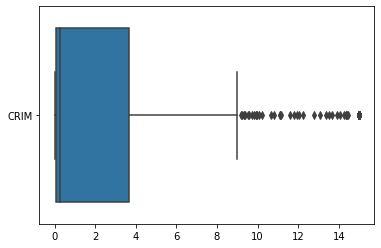

In [15]:
# Now check Outlier in the data

print("Quantile Distribution")
print(pd.DataFrame(independent_variables['CRIM'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,0.95 ,1])))
sns.boxplot(data = independent_variables, orient = 'h', order = ['CRIM'])

# Inference : 
# Capping to 95% Datapoints
independent_variables['CRIM'] = np.where(independent_variables['CRIM'] > 15, 15, independent_variables['CRIM'])